<a href="https://colab.research.google.com/github/woodwyyn/ML/blob/main/ML4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [6]:
 X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

In [11]:
model = LogisticRegression().fit(X_train, y_train)

#оценки вероятности принадлежности к каждому классу
y_pred_proba = model.predict_proba(X_test)
y_pred_proba

#сумма по строчке всегда будет единица

array([[4.02958497e-03, 9.95970415e-01],
       [2.00643855e-03, 9.97993561e-01],
       [9.94696564e-01, 5.30343592e-03],
       [8.47909962e-01, 1.52090038e-01],
       [1.66614096e-03, 9.98333859e-01],
       [4.99240075e-01, 5.00759925e-01],
       [9.80208762e-01, 1.97912375e-02],
       [9.76507391e-01, 2.34926092e-02],
       [1.79866697e-02, 9.82013330e-01],
       [2.93132539e-01, 7.06867461e-01],
       [9.95836132e-01, 4.16386810e-03],
       [2.53456369e-01, 7.46543631e-01],
       [9.92314475e-01, 7.68552501e-03],
       [3.80237693e-02, 9.61976231e-01],
       [6.47256719e-02, 9.35274328e-01],
       [1.91873737e-01, 8.08126263e-01],
       [8.55142720e-01, 1.44857280e-01],
       [4.34150814e-02, 9.56584919e-01],
       [8.43060465e-01, 1.56939535e-01],
       [5.51009943e-02, 9.44899006e-01],
       [1.32996996e-01, 8.67003004e-01],
       [5.89343759e-01, 4.10656241e-01],
       [9.79492824e-01, 2.05071761e-02],
       [3.32717535e-01, 6.67282465e-01],
       [9.957351

Построение кривой ROC

In [13]:
"""
 Функция принимает реальные зачения X и веротяности отнесения к данному классу
 Возвращает:
  Метрика FPR (false positive rate
  Метрика TPR (true positive rate)
  значение порога
"""

fpr, tpr, threshold = roc_curve(y_test, y_pred_proba[:, 1])

In [17]:
print(f"Кол-во порогов: {len(threshold)}")

Кол-во порогов: 120


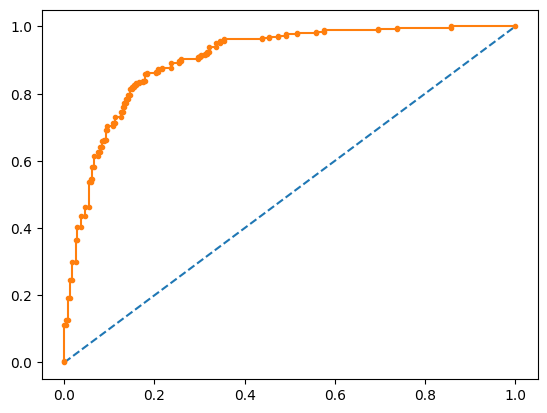

In [20]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

#классификатор работает лучше, чем случайное предсказание

In [26]:
# метрика ROC-AUC измеряет площарь кривой под графиком

print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba[:, 1]) * 100:.2f}%")

ROC-AUC: 90.28%


Построение график PR-кривой

In [42]:
from sklearn.metrics import precision_recall_curve, auc, classification_report

In [35]:
"""
 Функция принимает реальные зачения X и веротяности отнесения к данному классу
 Возвращает:
  Метрика precision массив значений точности для каждого порога.
  Метрика recall массив значений полноты для каждого порога
  значения различных порога
"""

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])

In [32]:
print(f"Кол-во порогов: {len(thresholds)}")

Кол-во порогов: 500


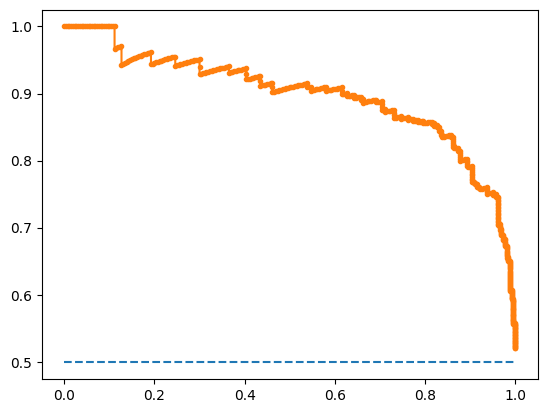

In [34]:
# прямая тривиального классификатора
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')

plt.plot(recall, precision, marker='.')
plt.show()

In [40]:
#  площадь под графиком PR-кривой - PR-AUC

print(f"AP (средней точностью модели - average precision): {auc(recall, precision) * 100:.2f}%")

AP (средней точностью модели - average precision): 89.77%


In [44]:
y_test_pred = model.predict(X_test)

# Характиризует поведение только в одной точки, при пороге по умолчанию (0.5)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       240
           1       0.84      0.85      0.84       260

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500



Обучение модели

In [46]:
from sklearn.neighbors import KNeighborsClassifier

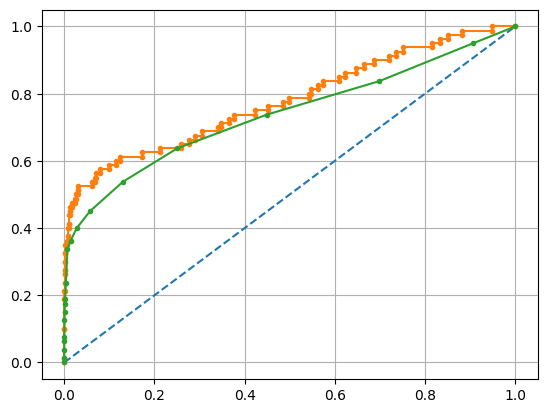

In [85]:
model2 = KNeighborsClassifier(n_neighbors=250).fit(X_train, y_train)
y_pred2_proba = model2.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
fpr1, tpr1, _ = roc_curve(y_test, y_pred2_proba[:, 1])

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.plot(fpr1, tpr1, marker='.')
plt.grid(True)
plt.show()

# Логистическая регрессия работает лучше

In [55]:
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred2_proba[:, 1]) * 100:.2f}%")

ROC-AUC: 86.98%


Дизбаланс классов

In [69]:
# 99% отрицательных, 1% положительных
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99, 0.01], random_state=1)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=4)

print('Датасет: Class0=%d, Class1=%d' % (len(y[y==0]), len(y[y==1])))
print('Обучающая: Class0=%d, Class1=%d' % (len(y_train[y_train==0]), len(y_train[y_train==1])))
print('Тестовая: Class0=%d, Class1=%d' % (len(y_test[y_test==0]), len(y_test[y_test==1])))

Датасет: Class0=985, Class1=15
Обучающая: Class0=490, Class1=10
Тестовая: Class0=495, Class1=5


In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

print('Датасет: Class0=%d, Class1=%d' % (len(y[y==0]), len(y[y==1])))
print('Обучающая: Class0=%d, Class1=%d' % (len(y_train[y_train==0]), len(y_train[y_train==1])))
print('Тестовая: Class0=%d, Class1=%d' % (len(y_test[y_test==0]), len(y_test[y_test==1])))

Датасет: Class0=985, Class1=15
Обучающая: Class0=493, Class1=7
Тестовая: Class0=492, Class1=8


In [71]:
model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       492
           1       0.00      0.00      0.00         8

    accuracy                           0.98       500
   macro avg       0.49      0.50      0.49       500
weighted avg       0.97      0.98      0.97       500



ROC-кривая

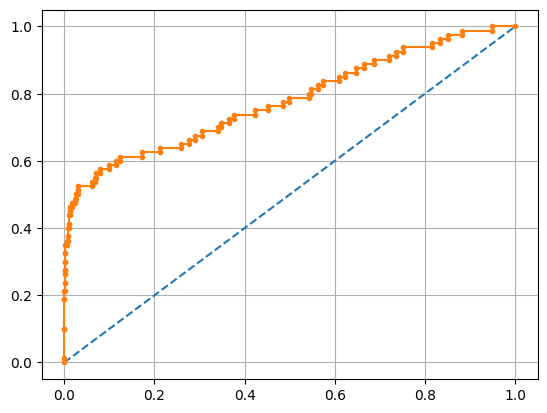

In [84]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.grid(True)
plt.show()

In [75]:
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba[:, 1]) * 100:.2f}%")

ROC-AUC: 70.91%


PR-кривая

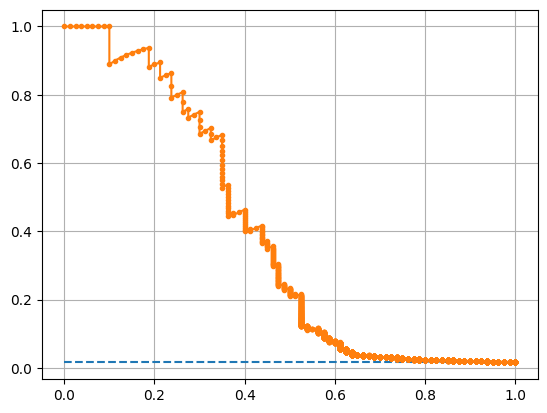

In [83]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.grid(True)
plt.show()

In [78]:
print(f"AP (средней точностью модели - average precision): {auc(recall, precision) * 100:.2f}%")

AP (средней точностью модели - average precision): 9.32%


Выбор значения порога по кривым

In [80]:
X, y = make_classification(n_samples=10000, n_classes=2, weights=[0.99, 0.01], random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

PR-кривая

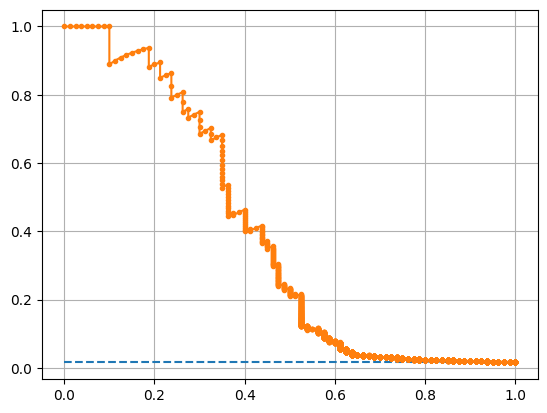

In [82]:
p, r, pr_thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='.')
plt.grid(True)
plt.show()

In [86]:
print(f"AP: {auc(r, p) * 100:.2f}%")

AP: 38.82%


In [91]:
y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4920
           1       0.90      0.11      0.20        80

    accuracy                           0.99      5000
   macro avg       0.94      0.56      0.60      5000
weighted avg       0.98      0.99      0.98      5000



при разных значениях порога иногда метрика precision будет больше, иногда - recall => будем оптимизировать по метрике F1 (F1 - это среднее геометрическое между Precision и Recall)

In [92]:
from numpy import argmax

In [96]:
f1 = (2 * p * r) / (p + r)
ix = argmax(f1)
pr_thresholds[ix]

print('Порог=%f, F-Score=%.3f' % (pr_thresholds[ix], f1[ix]))

Порог=0.182471, F-Score=0.463


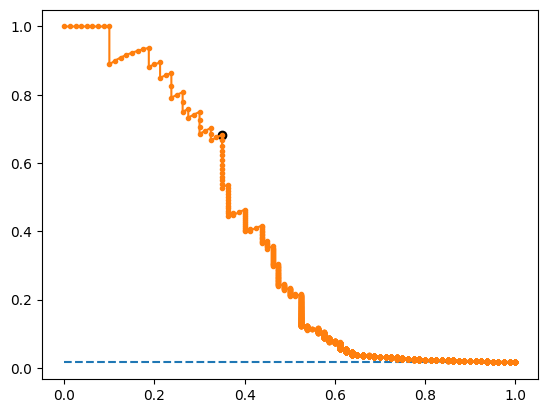

In [95]:
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='.')
plt.scatter(r[ix], p[ix], marker='o', color='black')
plt.show()

In [98]:
y_pred = (y_pred_proba[:, 1] > pr_thresholds[ix]).astype('int')
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4920
           1       0.68      0.34      0.45        80

    accuracy                           0.99      5000
   macro avg       0.83      0.67      0.72      5000
weighted avg       0.98      0.99      0.98      5000



In [99]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4920
           1       0.90      0.11      0.20        80

    accuracy                           0.99      5000
   macro avg       0.94      0.56      0.60      5000
weighted avg       0.98      0.99      0.98      5000

